## CROSS SELL PROJECT 
#### di MATTEO MARCO COSTA - 26/07/2024 - by Profession AI <br>

<div style="text-align: justify;" markdown="1">
Il cliente è una compagnia di assicurazioni che ha fornito un'assicurazione sanitaria ai suoi clienti, adesso si richiede di costruire un modello predittivo in grado di prevedere se gli assicurati dell'anno passato potrebbero essere interessati ad acquistare anche un'assicurazione per il proprio veicolo.

***

Il dataset è composto dalle seguenti proprietà:
* **ID**: *id univoco dell'acquirente.*
* **GENDER**: *sesso dell'acquirente.*
* **AGE**: *età dell'acquirente.*
* **DRIVING_LICENSE**: *1 se l'utente ha la patente di guida, 0 altrimenti.*
* **REGION_CODE**: *codice univoco della regione dell'acquirente.*
* **PREVIOUSLY_INSURED**: *1 se l'utente ha già un veicolo assicurato, 0 altrimenti.*
* **VEHICLE_AGE**: *età del veicolo.*
* **VEHICLE_DAMAGE**: *1 se l'utente ha danneggiato il veicolo in passato, 0 altrimenti.*
* **ANNUAL_PREMIUM**: *la cifra che l'utente deve pagare come premio durante l'anno.*
* **POLICY_SALES_CHANNEL**: *codice anonimizzato del canale utilizzato per la proposta (es. per email, per  telefono, di persona, etc...)*
* **VINTAGE**: *numero di giorni dalla quale l'utente è cliente dell'azienda.*
* **RESPONSE**: *1 se l'acquirente ha risposto positivamente alla proposta di vendita, 0 altrimenti.*

***

L'obiettivo del modello è prevedere il valore della variabile **Response** (variabile target).

***

NB: *fare attenzione alla distribuzione delle classi. In caso di classi sbilanciate si può provare a penalizzare la classe più frequente (ricordare l'argomento class_weight) o utilizzare l'oversampling/ l'undersampling.*
</div>

### DATA CLEANING & PREPARATION  

<div style="text-align: justify;" markdown="1"> 

In questa prima fase progettuale esploreremo il dataset, effettuando delle prime analisi esplorative. Il dataset fornito è un file con estensione csv: per importarlo utilizzeremo le note function della libreria pandas. 

</div>

In [34]:
#Import delle library 
import pandas as pd
import collections
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, recall_score, precision_score, f1_score   

In [35]:
#Import del dataset: il dataset è in formato csv
df = pd.read_csv("insurance_cross_sell.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [36]:
#Shape dataset: determinazione delle dimensioni del dataset
record = list(df.shape)
print(f"Il dataset contiene {record[0]} righe e {record[1]} colonne")

Il dataset contiene 381109 righe e 12 colonne


In [37]:
#Columns: elenco delle variabili contenute nel dataset
columns = list(df.columns)
for col in columns:
    print(col)

id
Gender
Age
Driving_License
Region_Code
Previously_Insured
Vehicle_Age
Vehicle_Damage
Annual_Premium
Policy_Sales_Channel
Vintage
Response


<div style="text-align: justify;" markdown="1"> 
L'import del dataset è avvenuto correttamente. Si possono notare le dodici variabili riportate nella   traccia del progetto. Tra queste c'è anche la variabile target: in modo coerente al problema di classificazione, essa sembra essere dicotomica. Possiamo iniziare a notare la presenza di variabili categoriali (ordinali e non) che necessiteranno di opportune tecniche di encoding che avremo modo di approfondiere in seguito.
</div>

In [38]:
#Info function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [39]:
#Count check
print(f"Conteggio variabili:\n\n{df.count()}")

Conteggio variabili:

id                      381109
Gender                  381109
Age                     381109
Driving_License         381109
Region_Code             381109
Previously_Insured      381109
Vehicle_Age             381109
Vehicle_Damage          381109
Annual_Premium          381109
Policy_Sales_Channel    381109
Vintage                 381109
Response                381109
dtype: int64


<div style="text-align: justify;" markdown="1"> 
Possiamo notare che il numero di valorizzazioni di ogni variabile è non nulla e coincide col numero complessivo di righe del dataset. Non è dunque necessario effettuare eventuali procedure di drop o di sostituzione per valori mancanti, specialmente per la variabile target. 
</div>


<div style="text-align: justify;" markdown="1"> 
Veniamo ora a distinguere tra variabili categoriche e numeriche in modo da effettuare opportune tecniche di encoding e data scaling. Nel caso in oggetto, assumeremo la seguente distinzione:
</div>
<br>

* **CATEGORICHE**: *Gender*, *Driving_License*, *Previously_Insured*, *Response*
* **NUMERICHE**: *Age*, *Vehicle_Age*, *Vehicle_Damage*, *Annual_Premium*, *Vintage* 

<br>

<div style="text-align: justify;" markdown="1"> 
Ai fini del modello, le variabili ID e REGION_CODE verrano eliminate dato che sono da considerarsi come informazioni di tipo identificativo.
</div>

In [40]:
#Variable selection: distinzione tra variabili categoriche e numeriche
categorical = list(df[["Gender", "Driving_License", "Previously_Insured", "Response"]])
lc = len(categorical)
print(f"Numero di variabili categoriche: {lc}")

numerical = list(df[["Age", "Vehicle_Age", "Vehicle_Damage", "Annual_Premium", "Vintage"]])
ln = len(numerical)
print(f"Numero di variabili categoriche: {ln}")

#Drop della variabile ID
df_drop = df.drop(['id', 'Region_Code'], axis=1)
df_drop.head()

Numero di variabili categoriche: 4
Numero di variabili categoriche: 5


,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,1,< 1 Year,No,27496.0,152.0,39,0


In [41]:
#Check colonne: verifica del drop delle colonne id e Region_Code
columns_new = list(df_drop.columns)
for col in columns_new:
    print(col)

Gender
Age
Driving_License
Previously_Insured
Vehicle_Age
Vehicle_Damage
Annual_Premium
Policy_Sales_Channel
Vintage
Response


In [42]:
#Riconctrollo di eventuali elementi mancanti (isna function)
print(f"Elementi mancanti (categorical):\n\n{df_drop[categorical].isna().sum()}\n")
print(f"Elementi mancanti (numerical):\n\n{df_drop[numerical].isna().sum()}")

Elementi mancanti (categorical):

Gender                0
Driving_License       0
Previously_Insured    0
Response              0
dtype: int64

Elementi mancanti (numerical):

Age               0
Vehicle_Age       0
Vehicle_Damage    0
Annual_Premium    0
Vintage           0
dtype: int64


<div style="text-align: justify;" markdown="1">
Procediamo ora ad un'analisi più approfodnita di qualche variabile in modo da far emergere eventuali informazioni interessenti anche da un punto di vista di business modeling.
<div>

### Exploratory Data Analysis (EDA)

In [43]:
import seaborn as sns

def barplot_stat(var, dataset, freq = "No"):
    plt.figure(figsize=(10,6))
    sns.countplot(data = dataset, x = var).tick_params(axis='x', rotation=60)
    if freq == "Yes":
        print(f"{var} --- Absolute frequency distribution")
        print(f"{dataset[var].value_counts()}\n")
        print(f"{var} --- Relative frequency distribution")
        print(f"{dataset[var].value_counts()/len(dataset)}\n")
    
        """
        La function barplot_stat prende in input il nome di una variabile (var) contenuta in 
        un dataset (dataset) e crea un report sulla distribuzione delle frequenze assolute 
        e relative della variabile interessata.
        """

Gender --- Absolute frequency distribution
Male      206089
Female    175020
Name: Gender, dtype: int64

Gender --- Relative frequency distribution
Male      0.540761
Female    0.459239
Name: Gender, dtype: float64



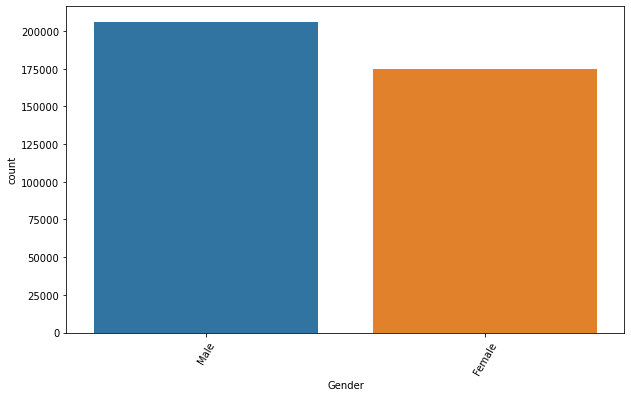

In [44]:
barplot_stat("Gender", df_drop, freq = "Yes")

<div style="text-align: justify;" markdown="1">
Possiamo notare che la distribuzione della clientela è abbastanza omogenea tra i due sessi.
<div>

Driving_License --- Absolute frequency distribution
1    380297
0       812
Name: Driving_License, dtype: int64

Driving_License --- Relative frequency distribution
1    0.997869
0    0.002131
Name: Driving_License, dtype: float64



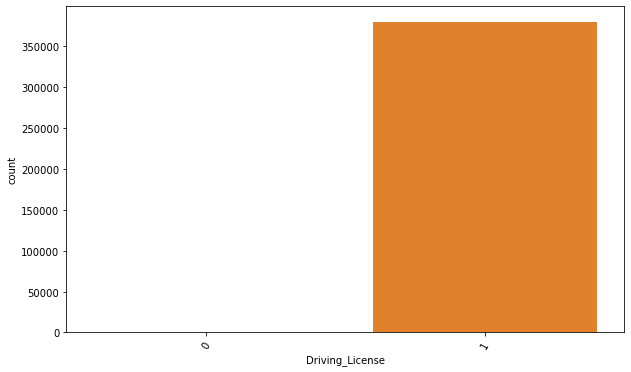

In [45]:
barplot_stat("Driving_License", df_drop, freq = "Yes")

<div style="text-align: justify;" markdown="1">
Dal barplot della variabile DRIVING_LICENSE si osserva che 812 clienti non hanno una patente di guida.
Questi potrebbero essere considerabili come non potenziali clienti oppure possibili qualora decidessero in futuro di prendere una patente. Notiamo comunque che il 99% della clientela ha una licenza di guida e quindi l'idea di proporre una polizza sui veicoli sembra sensata da parte della compagnia. Ai fini del modello terremo comunque conto di questi 812 clienti.
<div>

Previously_Insured --- Absolute frequency distribution
0    206481
1    174628
Name: Previously_Insured, dtype: int64

Previously_Insured --- Relative frequency distribution
0    0.54179
1    0.45821
Name: Previously_Insured, dtype: float64



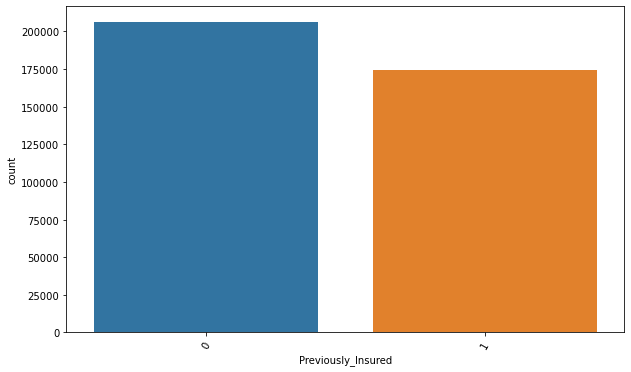

In [46]:
barplot_stat("Previously_Insured", df_drop, freq = "Yes")

<div style="text-align: justify;" markdown="1">
Dal barplot della variabile PREVIOUSLY_INSURED possiamo notare che il numero di utenti che non hanno
un'assicurazione sulla macchina (flag = 0) sono superiori a quelli che ne hanno già una. Questo suggerisce di avere circa 200000 potenziali clienti a cui proporre l'assicurazione o eventualmente proporre un rinnovo o una polizza più vantaggiosa a quelli che ne hanno già una (flag = 1). Nella prossima sezione cerchiamo di apporofondire se c'è stato qualche canale di vendita prediletto tra quelli proposti: la variabile POLICY_SALES_CHANNEL identifica una tipologia di canale di comunicazione con cui è stata fatta la proposta.
<div>

Valore di soglia: 2458.767741935484
Canali di vendita maggiormente usati: dict_keys([26.0, 152.0, 160.0, 124.0, 156.0, 163.0, 157.0, 122.0, 154.0, 151.0])


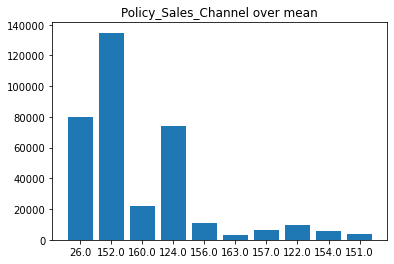

In [47]:
#Studio della Policy_Sales_Channel: cerchiamo di indagare se c'è un canale di vendita prediletto
import statistics as stat

#Individuiamo un valore di soglia per determinare i canali di vendita più rilevanti: useremo la media
response = list(df_drop["Policy_Sales_Channel"])
counter = collections.Counter(response)
mean_values = stat.mean(counter.values())
print(f"Valore di soglia: {mean_values}")

#Canali di vendita maggiormente adottati in base al valore di soglia (mean_values)
result = {key: value for (key, value) in counter.items() if value >= mean_values}
print(f"Canali di vendita maggiormente usati: {result.keys()}")

df_PSC = pd.DataFrame(result.items(), columns=['Policy_Sales_Channel', 'Count'])

#Barplot
df_astypePSC = df_PSC.copy()
df_astypePSC["Policy_Sales_Channel"] = df_PSC["Policy_Sales_Channel"].astype(str)
plt.title("Policy_Sales_Channel over mean")
plt.bar(df_astypePSC["Policy_Sales_Channel"], df_astypePSC["Count"])
plt.show()

In [48]:
#Valori in percentuale di ogni classe rispetto ai record totali
df_PSC["Perc"] = df_PSC["Count"]/len(df_drop)
df_PSC = df_PSC.round({"Perc": 2})
df_PSC

,Policy_Sales_Channel,Count,Perc
0,26.0,79700,0.21
1,152.0,134784,0.35
2,160.0,21779,0.06
3,124.0,73995,0.19
4,156.0,10661,0.03
5,163.0,2893,0.01
6,157.0,6684,0.02
7,122.0,9930,0.03
8,154.0,5993,0.02
9,151.0,3885,0.01


<div style="text-align: justify;" markdown="1">
Osserviamo che le classi 26, 152, 124 rappresentano circa il 20%, 35% e 19% del totale. Possiamo dunque osservare che questi tre canali sembrano quelli maggiormente utilizzati dai venditori. Proviamo ora a verificare la quantità di persone che hanno accettato la proposta di vendita (RESPONSE = 1) in queste tre classi e vedere se i tre canali individuati sono stati funzionali alla vendita.
<div>

In [49]:
#Iniziamo a filtrare il dataset df_drop sui tre canali di vendita maggiormente usati
df_drop_PSCfiltered = df_drop[df_drop.Policy_Sales_Channel.isin([26.0, 152.0, 124.0])]
df_drop_PSCfiltered = df_drop_PSCfiltered[["Policy_Sales_Channel", "Response"]]

#Report
df_drop_PSCfiltered.groupby(['Policy_Sales_Channel','Response']).size()

Policy_Sales_Channel  Response
26.0                  0            63809
                      1            15891
124.0                 0            59999
                      1            13996
152.0                 0           130926
                      1             3858
dtype: int64

<div style="text-align: justify;" markdown="1">
Emerge dunque che la variabile POLICY_SALES_CHANNEL sembra interessante da considerare ai fini del modello. Anticipiamo che questa variabile sarà soggetta a un one-hot encoding. Nella sezione che segue proviamo invece a fare qualche considerazione sull'età della clientela.
<div>

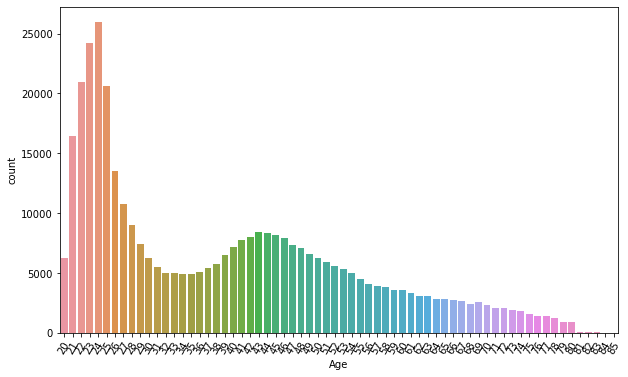

In [50]:
#Age barplot: barplot della variable age
barplot_stat("Age", df_drop, freq = "No")

<div style="text-align: justify;" markdown="1">
Possiamo notare che la distribuzione della variabile AGE è asimmetrica, in particolare maggiormente concentrata negli intervalli 20-30 anni e 40-50 anni. Questo potrebbe suggerire di concentrare l'attenzione a proporre una polizza sul veicolo ai clienti di questi target d'età che rappresentano una buona parte del dataset. Inoltre non sembrano esserci outliers: i valori dell'età sono compresi tra i 20 e gli 83 anni, anni per cui possedere una patente di guida è lecita.
<div>

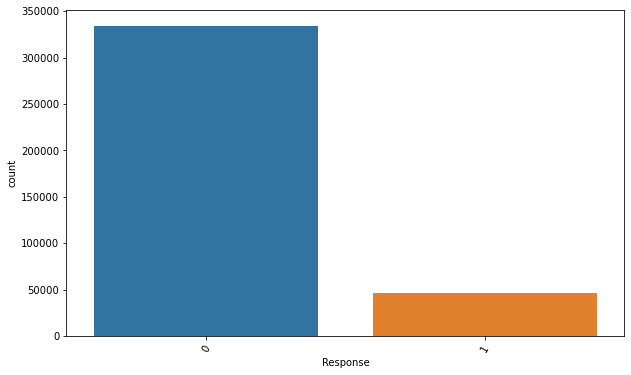

In [51]:
#Target variables: distribuzione della variabile RESPONSE
barplot_stat("Response", df_drop)

<div style="text-align: justify;" markdown="1">
Possiamo notare che la variable target RESPONSE non è bilanciata, in particolare lo status 0 corrisponde a circa l'87% del dataset. Si può quindi notare un forte sbilanciamento tra le due categorie e questo potrebbe portare problemi nel modello in fase di addestramento. Questo suggerisce di adottare una tecnica di oversampling sul training set.  
<div>

### DATA ENCODING
<div style="text-align: justify;" markdown="1">
Le variabili GENDER, VEHICLE_DAMAGE, VEHICLE_AGE sono variabili categoriche non ordinali. Possiamo applicare una tecnica di one-hot encoding col fine di creare delle matrici booleane per ognuna di esse.
Osserviamo anche che le varaibili DRIVING_LICENSE e PREVIOUSLY_INSURED sono già da input dei flag.
<div>


In [52]:
#Encoding delle variabili categoriche: applico un one-hot encoding (eventuale option dummy_na=True)
df_encod = pd.get_dummies(df_drop, columns=['Gender', 
                                            "Vehicle_Damage", 
                                            "Vehicle_Age", 
                                            "Policy_Sales_Channel"])
df_encod.head()

#Altre variabili numeriche (intese come categoriche) sono già flag (es. Driving_License) 

,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Female,Gender_Male,Vehicle_Damage_No,Vehicle_Damage_Yes,...,Policy_Sales_Channel_152.0,Policy_Sales_Channel_153.0,Policy_Sales_Channel_154.0,Policy_Sales_Channel_155.0,Policy_Sales_Channel_156.0,Policy_Sales_Channel_157.0,Policy_Sales_Channel_158.0,Policy_Sales_Channel_159.0,Policy_Sales_Channel_160.0,Policy_Sales_Channel_163.0
0,44,1,0,40454.0,217,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,76,1,0,33536.0,183,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,47,1,0,38294.0,27,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,21,1,1,28619.0,203,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,0
4,29,1,1,27496.0,39,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [53]:
#df_encod shape
print(df_encod.shape)

(381109, 168)


Il nuovo dataset ha quindi 168 colonne rispetto a prima.

### TRAINING & MODELING
<div style="text-align: justify;" markdown="1">
Per il nostro problema di classificazione adotteremo un modello di regressione logistica, un tipico approccio nei problemi di classificazione. Dato un insieme di osservazioni, tale algoritmo permette di classificare le osservazioni in due o più classi discrete. Pertanto, si suppone che la variabile target sia di natura discreta (dicotomica o più).
<div>

<br>

#### LOGIT Model
<div style="text-align: justify;" markdown="1">
Data $x_1$ una variabile esplicativa e $z$ la variabile target, in un modello di regressione classico vorremo che
<div>
<br>
\begin{equation}
z = \beta_0 + x_1\beta_1,
\end{equation}
<br>
<div style="text-align: justify;" markdown="1">
dove $\beta_0$ e $\beta_1$ sono i parametri del modello da determinare. In presenza di più variabili esplicative, la descrizione precedente può venire generalizzata come segue:
<div>
<br>
\begin{equation}
z = \beta_0 + \sum_{i=1}^{n}x_i\beta_i.
\end{equation}
<br>

<center><img src="lr.png" width=370></center>
<center><br>Grafico della formula di regressione prima esposta. I valori della variabile <br> risposta 
si concentrano in prossimità di z = 0  e z = 1.</center>

<br>

<div style="text-align: justify;" markdown="1">
Il valore di risposta, che indichiamo con $z$, viene poi convertito in un valore di probabilità compreso tra 0 ed 1. Tale conversione avviene applicando la funzione sigmoide
<div>

<br>
\begin{equation}
\phi(z) = \frac{1}{1+e^{-z}} \in (0, 1],
\end{equation}
<br>

<div style="text-align: justify;" markdown="1">
che mappa qualsiasi valore reale in un valore compreso tra 0 e 1, in modo così da associare un grado di probabilità al valore di $z$. 
</div>

<br>

<center><img src="logpro.png" width=370></center>
<center><br>Trasformazione sigmoidale.</center>

<br>

<div style="text-align: justify;" markdown="1">
Una volta effettuata tale trasformazione, per mappare il valore di probabilità su una classe discreta (es. vero/falso), si sceglie un valore di soglia (threshold) in modo così da costruire il criterio di classificazione. In generale, il valore di threshold è posto a 0,5. Ad esempio, se si ha un valore di probabilità pari a 0,8 (quindi maggiore di 0,5), questa osservazione verrà mappata nella classe 1 mentre per un valore di probabilità pari a 0,2 (quindi minore di 0,5), l'osservazione verrà posta nella classe 0.
</div>

In [54]:
#Modelling: costruzione del set di train e di test
features = df_encod.drop(['Response'], axis=1)
target = df_encod['Response']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.3)

### OVERSAMPLING
<div style="text-align: justify;" markdown="1">
In un problema di classificazione si va ad addestrare un modello che sappia dinstinugere tra due o più classi. Nel nostro caso, vorremmo creare un modello che sappia distinguere tra un cliente propenso ad accettare una nuova assicurazione sul proprio veicolo da uno che non vorrà. Come prima osservato, la variabile target RESPONSE è sbilanciata sulle sue due valorizzazioni. In generale, un forte sbilanciamento, come in questo caso, comporterebbe delle difficoltà in fase di training. In questi casi si può introdurre una tecnica di oversampling da applicare al training set, un processo che consiste nel generare nuovi dati simili alla classe meno rappresentata. Si tratta quindi di creare nuove osservazioni, andando quindi a simulare nuovi dati che nel dataset di training non esistevano. Esistono tecniche abbastanza robuste di oversampling che possono garantire una certà uniformità rispetto al dataset originario. 
<div>

<br>

<br>

#### Tecniche di Oversampling
Qui di seguito riportiamo alcune delle principali tecniche di oversampling:

<br>

- Naive Random
- SMOTE (Synthetic Minority Oversampling Technique)
- SVM-SMOTE
- ADASYN (Adaptive Synthetic)
- K-Means SMOTE

<br>

<div style="text-align: justify;" markdown="1">
L'idea base che accomuna queste tecniche è quella di aggiungere in modo aleatorio osservazioni già esistenti o simili nel dataset di input.
<div>

<br>

<br>

#### RandomOverSampler di Python
<div style="text-align: justify;" markdown="1">
Nel nostro caso useremo la function RandomOverSampler che permette duplicare in modo casuale (Naive Random) parte dei record appartenenti alla classe minoritaria. In modo randomico vengono selezionate opportuni record appartenenti alla classe minoritaria in modo così da arricchire tale classe.
<div>

<br>

<img src="overs.PNG" width="600">

<br>

<br>

#### RandomOverSampler: LINK manualistica
Riportiamo qui di seguito un link alla manualistica Python: 
https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html


In [55]:
#OverSampling (per l'UnderSampling basta usare la RandomUnderSampler con strategy majority)
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)

#Summary pre-oversampling
print(f"Before oversampling: {collections.Counter(y_train)}")

#Oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
features_resampled, target_resampled = oversample.fit_resample(X_train, y_train)

#Check post-oversampling
print(f"After oversampling: {collections.Counter(target_resampled)}")

Before oversampling: Counter({0: 233985, 1: 32791})
After oversampling: Counter({0: 233985, 1: 233985})


<div style="text-align: justify;" markdown="1">
Avendo applicato la RandomOverSampler, otteniamo un nuovo dataset di training in cui le due classi sono ora in stessa proporzione. Passiamo ora a effettuare la standardizzazione delle variabili numeriche.
<div>

In [56]:
#Standardizzazione delle numeriche sul set di training e di test
scaler = StandardScaler()
features_resampled = scaler.fit_transform(features_resampled)
X_test = scaler.transform(X_test)

<div style="text-align: justify;" markdown="1">
Ricordiamo che sul set di train si è applicata la fit_transform: questa function permette prima di determinare la media e la varianza nelle numeriche contenute nel train set mentre la transform esegue l'effettiva procedura di standardizzazione, che indichiamo con $S$, al generico dato numerico $x_i$:

<br>

\begin{equation}
S(x_i) = \frac{x_i - \mu}{\sigma^2}.
\end{equation}

<br>

Sul set di test invece si è applicata solo la transform che effettua la standardizzazione tenendo di default i valori di media e varianza determinati dalla fit_transform.
<div>

In [57]:
#Fitting: applicazione della logit regression
lr = LogisticRegression()
result = lr.fit(features_resampled, target_resampled)
result

LogisticRegression()

In [58]:
#Coefficienti del modello 
print(f"Coefficienti beta: {lr.coef_}") 
print(f"Intercetta: {lr.intercept_}")

Coefficienti beta: [[-4.00373480e-01  5.02765826e-02 -1.71058221e+00  4.37970405e-02
  -4.52882449e-03 -2.61496553e-02  2.61496553e-02 -4.49566847e-01
   4.49566847e-01  5.87731875e-02 -1.09896540e-01  8.92927807e-02
   4.39027619e-03  1.78302769e-03  3.81227567e-02  1.82441478e-02
  -1.35593889e-02  6.50248502e-03 -1.75345445e-02  3.76268758e-03
   1.37262657e-02 -1.39963266e-02  4.20950097e-03  1.11019089e-02
   5.75205510e-03 -4.70940302e-03 -1.66450945e-03  2.69774359e-03
  -1.30656267e-02 -4.48064184e-03 -3.61111319e-02  6.22226658e-03
  -1.52811521e-02  8.04481032e-03  1.18999492e-02  3.76847718e-02
   2.38133782e-01  1.73321581e-03 -9.78743900e-03  4.22332057e-03
   5.44609069e-03  3.37657717e-02 -4.03840577e-03 -1.71598519e-02
  -1.09511994e-02  2.59620069e-03  7.25078115e-03 -7.41980418e-03
  -1.73248277e-02 -6.54062479e-03 -2.44205142e-02 -1.99042136e-03
   6.89315427e-03  0.00000000e+00  1.08634936e-02 -1.24767102e-02
  -3.09080400e-02 -9.18540651e-03 -8.85991183e-03  1.2166

Otteniamo infatti 168 coefficienti in totale.

### MODEL PERFORMANCE
<div style="text-align: justify;" markdown="1">
In questa sezione cerchiamo di valutare la bontà del modello adottando le note metriche di un problema di classificazione. Ricordiamo brevemente alcune nozionni fondamentali traendo spunto da un esempio tratto dal sito https://www.humai.it/semplifichiamo/metriche-di-valutazione-dei-modelli-di-ai/
<div>

<br>

#### MATRICE DI CONFUSIONE
<div style="text-align: justify;" markdown="1">
Supponiamo di aver costruito un robot che deve indovinare il colore di una mela guardandola: rossa o non rossa.
<div>

<br>

<img src="mela.png" width="400">

<br>

<br>

<div style="text-align: justify;" markdown="1">
Veri Positivi (True Positive, TP): Supponiamo che il robot veda una mela rossa e dica “Questa mela è rossa!”. Ha dunque ha indovinato. Ogni volta che il robot fa questo, si dirà che questo è un “vero positivo”. 
<div>

<br>

<div style="text-align: justify;" markdown="1">
Falsi positivi (False Positive, FP) : Ora, se il robot vede una mela verde e la chiama per errore “rossa”, sta facendo un “falso positivo”. Si pensava che fosse vero, ma no, era falso. Il modello ha predetto positivamente, ma la previsione è errata.
<div>

<br>

<div style="text-align: justify;" markdown="1">
Veri Negativi (True Negative, TN): Si supponga che il robot guardi una mela verde e dica “Questa mela non è rossa”. Si tratta dunque di un “vero negativo”.
<div>

<br>

<div style="text-align: justify;" markdown="1">
Falsi Negativi (False Negative, FN): Infine, se il robot guarda una mela rossa e dice “Questa mela non è rossa”, sta commettendo un “falso negativo”.
<div>

<br>

#### Accuracy
<div style="text-align: justify;" markdown="1">
L'Accuracy indica quante volte il modello ha correttamente classificato un item del dataset rispetto al totale: 
<div>

<br>
\begin{equation}
A = \frac{TP+TN}{TP+FP+TN+FN}
\end{equation}
<br>

<div style="text-align: justify;" markdown="1">
Questa metrica è come contare quante volte il robot indovina il colore giusto delle mele e dividere per il numero totale di mele che ha provato a indovinare. Per esempio, se il robot ha provato 100 mele e ne ha indovinate 90, la sua Accuracy è pari a 90/100, quindi il 90%. In altri termini è la frazione dei campioni predetti correttamente rispetto al totale dei campioni. 
<div>

<br>

#### Precision
La Precision definisce quanto sensibile è uno strumento in presenza del segnale da riconoscere:

<br>
\begin{equation}
P = \frac{TP}{TP+FP}
\end{equation}
<br>

<div style="text-align: justify;" markdown="1">
Tale metrica informa di quanto spesso si è corretti quando si classifica una classe come positiva.  Immaginiamo che il robot dica “rossa” 50 volte, ma solo 40 delle mele che ha chiamato rosse erano davvero rosse. La precisione ci dice quanto spesso il robot ha ragione quando dice che una mela è rossa. Sarebbe 40/50, cioè l’80%. È la frazione delle predizioni corrette positive rispetto al totale delle predizioni positive. È dunque un indicatore di quanto sia affidabile il modello quando predice la classe positiva.
<div>

<br>

#### Recall
\begin{equation}
R = \frac{TP}{TP+FN}
\end{equation}

<br>

<div style="text-align: justify;" markdown="1">
Consideriamo quante mele rosse ci sono in totale. Diciamo che ci sono 60 mele rosse, ma il robot ne ha individuate correttamente solo 40 come rosse. La recall ci dice quante mele rosse il robot ha trovato rispetto al numero totale di mele rosse. Quindi, sarebbe 40/60, cioè circa il 67%. È la frazione delle vere positività identificate correttamente dal modello rispetto al totale delle istanze effettivamente positive.
<div>

<br>

#### LOGLOSS
<div style="text-align: justify;" markdown="1">
La LogLoss (perdita logaritmica) è una metrica che consente di stimare la bontà della classificazione. Per come è definita matematicamente, più essa tende a 0 e più la "classificazione" (associazione della probabilità predetta $p_i$ con la classe predetta) è ottimale. Indicando con $y_i$ il valore della classe, la LogLoss viene definita come segue:

\begin{equation}
LOGLOSS = -\frac{1}{n}\sum_{i=1}^{n}LL_i = -\frac{1}{n}\sum_{i=1}^{n}(y_i \ln p_i + (1-y_i)ln(1-p_i)).
\end{equation}
<div>

In [59]:
#Valutazione del modello: studio della LOGLOSS
     
#Per determinare la logloss bisogna determinare i rispettivi valori probabilistici (predict_proba)
y_pred_train = lr.predict(features_resampled)
y_proba_train = lr.predict_proba(features_resampled)
y_pred_test = lr.predict(X_test)
y_proba_test = lr.predict_proba(X_test)
     
print(f"TRAIN LOGLOSS: {log_loss(target_resampled, y_proba_train)}")
print(f"TEST LOGLOSS: {log_loss(y_test, y_proba_test)}")

TRAIN LOGLOSS: 0.4290936265379442
TEST LOGLOSS: 0.47650669975720816


Osserviamo valori delle logloss intorno al 0.4 sia per il set di train che per quello di test.

In [60]:
#Classification report sul test set
def classification_report(y_true, y_pred):
    print(f"ACCURACY: {accuracy_score(y_true, y_pred)}")
    print(f"PRECISION: {precision_score(y_true, y_pred)}")
    print(f"RECALL: {recall_score(y_true, y_pred)}")
    
classification_report(y_test, y_pred_test)

ACCURACY: 0.6744072140152012
PRECISION: 0.26418988648090813
RECALL: 0.9379984194266829


In [61]:
#Analogo classification report usando la sklearn library sul test set
from sklearn.metrics import classification_report
print("Test set")
print(classification_report(y_test, y_pred_test, digits = 4))

#NB: digits = 4 è una option per specificare il numero di cifre per l'arrotondamento

#Confronto con il train set
print("Train set")
print(classification_report(target_resampled, y_pred_train, digits = 4))

Test set
              precision    recall  f1-score   support

           0     0.9867    0.6379    0.7748    100414
           1     0.2642    0.9380    0.4123     13919

    accuracy                         0.6744    114333
   macro avg     0.6254    0.7879    0.5935    114333
weighted avg     0.8987    0.6744    0.7307    114333

Train set
              precision    recall  f1-score   support

           0     0.9211    0.6390    0.7546    233985
           1     0.7236    0.9453    0.8197    233985

    accuracy                         0.7921    467970
   macro avg     0.8224    0.7921    0.7872    467970
weighted avg     0.8224    0.7921    0.7872    467970



<div style="text-align: justify;" markdown="1">
Dato che il nostro problema consiste nell'individuare le classi positive, le metriche che ci interessano
sono l'accuracy e la recall. In particolare, si cerca di ottenere un modello che abbia una recall molto
alta per la classe 1 della variabile RESPONSE. Nel nostro caso osserviamo un'accuracy al 67% e una recall per la classe 1 del 94%. 
<div>

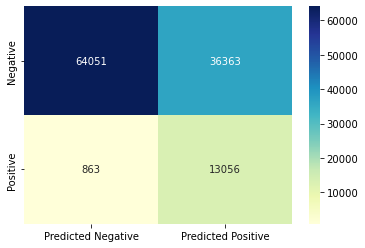

In [62]:
#Confusion matrix: grafico della matrice di confusione per il set di test
def plot_confusion_matrix(y_true, y_pred, labels=["Negative", "Positive"], show_precision=True, show_recall=True):
  cm = confusion_matrix(y_true, y_pred) #tn, fp, fn, tp 
  df_cm = pd.DataFrame(cm, index = labels, columns = ["Predicted "+labels[0],"Predicted "+labels[1]])
  sns.heatmap(df_cm, annot=True, fmt='d',  cmap='YlGnBu') #fmt è il format digit 

plot_confusion_matrix(y_test, y_pred_test)

<div style="text-align: justify;" markdown="1">
Veniamo ora a valutare lo score S sul train e test set; in particolare, esso può venir calcolato usando la function lr.score(X, y), dove X e y sono rispettivamente i vettori delle features associate alle rispettive variabile target del vettore y. Lo score è formalmente definito come

<br>

\begin{equation}
S = 1 - \frac{\sum_{i=1}^{n}(y_i - y_{i,pred})^2}{\sum_{i=1}^{n}(y_i-\mu_y)^2}, 
\end{equation}

<br>

e di default, la function lr.score(X, y), calcola la media $\mu_y$ delle componenti del vettore $y$ e i valori predetti $y_{pred}$. Più questo valore tende a 1, maggiore è la bontà di adattamento del modello.
<div>

In [63]:
#Checking for overfitting
print('Training set score: {:.4f}'.format(lr.score(features_resampled, target_resampled)))
print('Test set score: {:.4f}'.format(lr.score(X_test, y_test)))

Training set score: 0.7921
Test set score: 0.6744


I valori dei due score sono abbastanza simili: sembra dunque non esserci un problema di overfitting.

Prob --- Absolute frequency distribution
0    64914
1    49419
Name: Prob, dtype: int64

Prob --- Relative frequency distribution
0    0.567763
1    0.432237
Name: Prob, dtype: float64



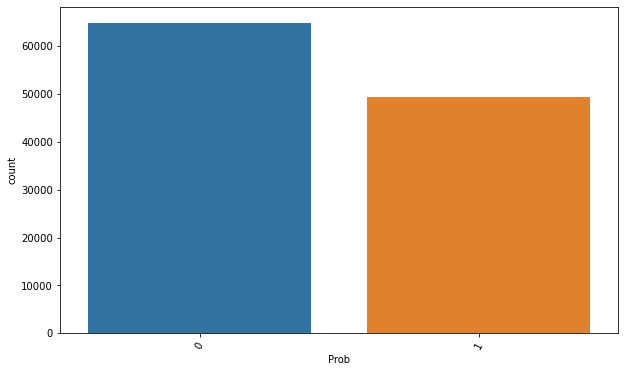

In [64]:
#Studio dei valori della probabilità: applichiamo la predict sul set di test
y_pred= lr.predict(X_test)  
y_pred_prob_df = pd.DataFrame(data=y_pred, columns=['Prob'])
barplot_stat("Prob", y_pred_prob_df, freq = "Yes")

<div style="text-align: justify;" markdown="1">
Possiamo notare che il modello classifica a 1 circa il 65% dei record del dataset su cui abbiamo effettuato l'oversmapling.
<div>

### CONCLUSIONI
<div style="text-align: justify;" markdown="1">
Applicando una metodologia di regressione logistica, si è giunti a un modello logit con una recall per la classe 1 pari al 94%. In particolare abbiamo effettuato una tecnica di oversampling sul training set dato che dalla EDA si era notato un forte sbilanciamento della classe 1 per la variabile target. A fine modellistici, delle 12 variabili presenti nel dataset non abbiamo considerato ID e REGION_CODE essendo da ritenersi come informazioni di tipo anagrafico. Abbiamo inoltre considerato la variabile POLICY_SALES_CHANNEL per via di alcuni canali che sembrano prediletti a fini delle proposte di vendita da parte della compagnia. Non si sono notati valori anomali per la variabile AGE e mancanti per le altre variabili in fase di EDA.
<br>